# Challenge Teelecom X - Análisis de evasión de clientes (Churn)

## 📌 Extracción(E - Extract)

In [33]:
import pandas as pd
import numpy as np
import json
import requests

In [34]:
# aceediento a la API
url = 'https://raw.githubusercontent.com/ingridcristh/challenge2-data-science-LATAM/refs/heads/main/TelecomX_Data.json'
df = requests.get(url)

# Aceeder a los datos

resultado = json.loads(df.text)

df = pd.json_normalize(resultado)
df.head()

,customerID,Churn,customer.gender,customer.SeniorCitizen,customer.Partner,customer.Dependents,customer.tenure,phone.PhoneService,phone.MultipleLines,internet.InternetService,...,internet.OnlineBackup,internet.DeviceProtection,internet.TechSupport,internet.StreamingTV,internet.StreamingMovies,account.Contract,account.PaperlessBilling,account.PaymentMethod,account.Charges.Monthly,account.Charges.Total
0,0002-ORFBO,No,Female,0,Yes,Yes,9,Yes,No,DSL,...,Yes,No,Yes,Yes,No,One year,Yes,Mailed check,65.6,593.3
1,0003-MKNFE,No,Male,0,No,No,9,Yes,Yes,DSL,...,No,No,No,No,Yes,Month-to-month,No,Mailed check,59.9,542.4
2,0004-TLHLJ,Yes,Male,0,No,No,4,Yes,No,Fiber optic,...,No,Yes,No,No,No,Month-to-month,Yes,Electronic check,73.9,280.85
3,0011-IGKFF,Yes,Male,1,Yes,No,13,Yes,No,Fiber optic,...,Yes,Yes,No,Yes,Yes,Month-to-month,Yes,Electronic check,98.0,1237.85
4,0013-EXCHZ,Yes,Female,1,Yes,No,3,Yes,No,Fiber optic,...,No,No,Yes,Yes,No,Month-to-month,Yes,Mailed check,83.9,267.4


## 🔧 Transformación (T - Transform)

In [35]:
id_churn = df[['customerID']]
id_churn

,customerID
0,0002-ORFBO
1,0003-MKNFE
2,0004-TLHLJ
3,0011-IGKFF
4,0013-EXCHZ
...,...
7262,9987-LUTYD
7263,9992-RRAMN
7264,9992-UJOEL
7265,9993-LHIEB


In [36]:
# Normalize the JSON data directly
df_normalized = pd.json_normalize(resultado)

# Select the relevant columns
df_normalized = df_normalized[['customerID', 'Churn', 'customer.gender', 'customer.SeniorCitizen', 'customer.Partner', 'customer.Dependents', 'customer.tenure', 'phone.PhoneService', 'phone.MultipleLines', 'internet.InternetService', 'internet.OnlineSecurity', 'internet.OnlineBackup', 'internet.DeviceProtection', 'internet.TechSupport', 'internet.StreamingTV', 'internet.StreamingMovies', 'account.Contract', 'account.PaperlessBilling', 'account.PaymentMethod', 'account.Charges.Monthly', 'account.Charges.Total']]

telecom_df = df_normalized.copy()
telecom_df.head()

,customerID,Churn,customer.gender,customer.SeniorCitizen,customer.Partner,customer.Dependents,customer.tenure,phone.PhoneService,phone.MultipleLines,internet.InternetService,...,internet.OnlineBackup,internet.DeviceProtection,internet.TechSupport,internet.StreamingTV,internet.StreamingMovies,account.Contract,account.PaperlessBilling,account.PaymentMethod,account.Charges.Monthly,account.Charges.Total
0,0002-ORFBO,No,Female,0,Yes,Yes,9,Yes,No,DSL,...,Yes,No,Yes,Yes,No,One year,Yes,Mailed check,65.6,593.3
1,0003-MKNFE,No,Male,0,No,No,9,Yes,Yes,DSL,...,No,No,No,No,Yes,Month-to-month,No,Mailed check,59.9,542.4
2,0004-TLHLJ,Yes,Male,0,No,No,4,Yes,No,Fiber optic,...,No,Yes,No,No,No,Month-to-month,Yes,Electronic check,73.9,280.85
3,0011-IGKFF,Yes,Male,1,Yes,No,13,Yes,No,Fiber optic,...,Yes,Yes,No,Yes,Yes,Month-to-month,Yes,Electronic check,98.0,1237.85
4,0013-EXCHZ,Yes,Female,1,Yes,No,3,Yes,No,Fiber optic,...,No,No,Yes,Yes,No,Month-to-month,Yes,Mailed check,83.9,267.4


In [37]:
# Vamos a renombrar las columnas
telecom_df.rename(columns={
    'customerID': 'id_cliente',
    'Churn': 'abandona',
    'customer.gender': 'genero',
    'customer.SeniorCitizen': 'es_ciudadano_senior',
    'customer.Partner': 'tiene_pareja',
    'customer.Dependents': 'tiene_dependientes',
    'customer.tenure': 'meses_en_empresa',
    'phone.PhoneService': 'servicio_telefonico',
    'phone.MultipleLines': 'lineas_multiple',
    'internet.InternetService': 'servicio_internet',
    'internet.OnlineSecurity': 'seguridad_online',
    'internet.OnlineBackup': 'respaldo_online',
    'internet.DeviceProtection': 'proteccion_dispositivos',
    'internet.TechSupport': 'soporte_tecnico',
    'internet.StreamingTV': 'tv_streaming',
    'internet.StreamingMovies': 'peliculas_streaming',
    'account.Contract': 'tipo_contrato',
    'account.PaperlessBilling': 'facturacion_electronica',
    'account.PaymentMethod': 'metodo_pago',
    'account.Charges.Monthly': 'gastos_mensuales',
    'account.Charges.Total': 'gastos_totales'
}, inplace=True)

telecom_df.head()

,id_cliente,abandona,genero,es_ciudadano_senior,tiene_pareja,tiene_dependientes,meses_en_empresa,servicio_telefonico,lineas_multiple,servicio_internet,...,respaldo_online,proteccion_dispositivos,soporte_tecnico,tv_streaming,peliculas_streaming,tipo_contrato,facturacion_electronica,metodo_pago,gastos_mensuales,gastos_totales
0,0002-ORFBO,No,Female,0,Yes,Yes,9,Yes,No,DSL,...,Yes,No,Yes,Yes,No,One year,Yes,Mailed check,65.6,593.3
1,0003-MKNFE,No,Male,0,No,No,9,Yes,Yes,DSL,...,No,No,No,No,Yes,Month-to-month,No,Mailed check,59.9,542.4
2,0004-TLHLJ,Yes,Male,0,No,No,4,Yes,No,Fiber optic,...,No,Yes,No,No,No,Month-to-month,Yes,Electronic check,73.9,280.85
3,0011-IGKFF,Yes,Male,1,Yes,No,13,Yes,No,Fiber optic,...,Yes,Yes,No,Yes,Yes,Month-to-month,Yes,Electronic check,98.0,1237.85
4,0013-EXCHZ,Yes,Female,1,Yes,No,3,Yes,No,Fiber optic,...,No,No,Yes,Yes,No,Month-to-month,Yes,Mailed check,83.9,267.4


In [38]:
telecom_df.columns

Index(['id_cliente', 'abandona', 'genero', 'es_ciudadano_senior',
       'tiene_pareja', 'tiene_dependientes', 'meses_en_empresa',
       'servicio_telefonico', 'lineas_multiple', 'servicio_internet',
       'seguridad_online', 'respaldo_online', 'proteccion_dispositivos',
       'soporte_tecnico', 'tv_streaming', 'peliculas_streaming',
       'tipo_contrato', 'facturacion_electronica', 'metodo_pago',
       'gastos_mensuales', 'gastos_totales'],
      dtype='object')

In [39]:
telecom_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7267 entries, 0 to 7266
Data columns (total 21 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   id_cliente               7267 non-null   object 
 1   abandona                 7267 non-null   object 
 2   genero                   7267 non-null   object 
 3   es_ciudadano_senior      7267 non-null   int64  
 4   tiene_pareja             7267 non-null   object 
 5   tiene_dependientes       7267 non-null   object 
 6   meses_en_empresa         7267 non-null   int64  
 7   servicio_telefonico      7267 non-null   object 
 8   lineas_multiple          7267 non-null   object 
 9   servicio_internet        7267 non-null   object 
 10  seguridad_online         7267 non-null   object 
 11  respaldo_online          7267 non-null   object 
 12  proteccion_dispositivos  7267 non-null   object 
 13  soporte_tecnico          7267 non-null   object 
 14  tv_streaming            

In [40]:
# Verificar si existen datos nulos

telecom_df.isnull().sum()

,0
id_cliente,0
abandona,0
genero,0
es_ciudadano_senior,0
tiene_pareja,0
tiene_dependientes,0
meses_en_empresa,0
servicio_telefonico,0
lineas_multiple,0
servicio_internet,0


In [41]:
# Identificar valores duplicados

print(telecom_df.duplicated().sum())

0


In [42]:
# Verificar errores de formato

for column in ['id_cliente', 'abandona', 'genero', 'es_ciudadano_senior',
            'tiene_pareja', 'tiene_dependientes', 'meses_en_empresa',
            'servicio_telefonico', 'lineas_multiple', 'servicio_internet',
            'seguridad_online', 'respaldo_online', 'proteccion_dispositivos',
            'soporte_tecnico', 'tv_streaming', 'peliculas_streaming',
            'tipo_contrato', 'facturacion_electronica', 'metodo_pago',
            'gastos_mensuales', 'gastos_totales']:
      print(f"Valores únicos para la columna '{column}: ")
      print(telecom_df[column].unique())
      print("-" * 20)

Valores únicos para la columna 'id_cliente: 
['0002-ORFBO' '0003-MKNFE' '0004-TLHLJ' ... '9992-UJOEL' '9993-LHIEB'
 '9995-HOTOH']
--------------------
Valores únicos para la columna 'abandona: 
['No' 'Yes' '']
--------------------
Valores únicos para la columna 'genero: 
['Female' 'Male']
--------------------
Valores únicos para la columna 'es_ciudadano_senior: 
[0 1]
--------------------
Valores únicos para la columna 'tiene_pareja: 
['Yes' 'No']
--------------------
Valores únicos para la columna 'tiene_dependientes: 
['Yes' 'No']
--------------------
Valores únicos para la columna 'meses_en_empresa: 
[ 9  4 13  3 71 63  7 65 54 72  5 56 34  1 45 50 23 55 26 69 11 37 49 66
 67 20 43 59 12 27  2 25 29 14 35 64 39 40  6 30 70 57 58 16 32 33 10 21
 61 15 44 22 24 19 47 62 46 52  8 60 48 28 41 53 68 51 31 36 17 18 38 42
  0]
--------------------
Valores únicos para la columna 'servicio_telefonico: 
['Yes' 'No']
--------------------
Valores únicos para la columna 'lineas_multiple: 
['No' 

## Limpiarlos datos (Ajustar los datos)

### Limpiando los datos de texto

Identificamos que las columnas que contiene datos de tipo texto son:
*   id_cliente
*   tipo_contrato
*   metodo_pago

In [43]:
# Limpiar columna id_cliente
telecom_df['id_cliente'] = telecom_df['id_cliente'].astype(str)
telecom_df['id_cliente'].sample(4)

,id_cliente
4075,5575-GNVDE
1001,1402-PTHGN
1474,2114-MGINA
6483,8908-SLFCJ


In [44]:
# Limpieza tipo_contrato
telecom_df['tipo_contrato'] = telecom_df['tipo_contrato'].str.lower()
telecom_df['tipo_contrato'] = telecom_df['tipo_contrato'].str.replace(r'\-', ' ', regex=True).str.strip()
telecom_df['tipo_contrato'].sample(4)


,tipo_contrato
410,month to month
6703,one year
3044,month to month
1064,one year


In [45]:
# Limpieza columna metodo_pago
telecom_df['metodo_pago'] = telecom_df['metodo_pago'].str.lower()
telecom_df['metodo_pago'] = telecom_df['metodo_pago'].str.replace(r'\-', ' ', regex=True).str.strip()
telecom_df['metodo_pago'].sample(4)


,metodo_pago
3005,credit card (automatic)
4240,bank transfer (automatic)
1912,credit card (automatic)
7253,bank transfer (automatic)


In [46]:
# Eliminamos los espacios de la columna cargos totales
telecom_df['gastos_totales'] = telecom_df['gastos_totales'].replace(' ',np.nan)
telecom_df['gastos_totales'] = pd.to_numeric(telecom_df['gastos_totales'], errors='coerce')
telecom_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7267 entries, 0 to 7266
Data columns (total 21 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   id_cliente               7267 non-null   object 
 1   abandona                 7267 non-null   object 
 2   genero                   7267 non-null   object 
 3   es_ciudadano_senior      7267 non-null   int64  
 4   tiene_pareja             7267 non-null   object 
 5   tiene_dependientes       7267 non-null   object 
 6   meses_en_empresa         7267 non-null   int64  
 7   servicio_telefonico      7267 non-null   object 
 8   lineas_multiple          7267 non-null   object 
 9   servicio_internet        7267 non-null   object 
 10  seguridad_online         7267 non-null   object 
 11  respaldo_online          7267 non-null   object 
 12  proteccion_dispositivos  7267 non-null   object 
 13  soporte_tecnico          7267 non-null   object 
 14  tv_streaming            

In [47]:
telecom_df['gastos_totales'].isna().sum()

np.int64(11)

In [48]:
# Eliminamos los registros de gastos_totales faltantes
telecom_df = telecom_df.dropna(subset=['gastos_totales'])

print(f'Cantidad de registros despues de la limpieza: {len(telecom_df)}')

Cantidad de registros despues de la limpieza: 7256


### Cuentas diarias

In [49]:
# Vamos a crear la columna cuentas_diarias, a traves de la facturacion mensual
telecom_df['cuentas_diarias'] = telecom_df['gastos_mensuales'] / 30
telecom_df['cuentas_diarias'].head()

/tmp/ipython-input-49-1117004437.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  telecom_df['cuentas_diarias'] = telecom_df['gastos_mensuales'] / 30


,cuentas_diarias
0,2.186667
1,1.996667
2,2.463333
3,3.266667
4,2.796667


In [50]:
telecom_df.head()

,id_cliente,abandona,genero,es_ciudadano_senior,tiene_pareja,tiene_dependientes,meses_en_empresa,servicio_telefonico,lineas_multiple,servicio_internet,...,proteccion_dispositivos,soporte_tecnico,tv_streaming,peliculas_streaming,tipo_contrato,facturacion_electronica,metodo_pago,gastos_mensuales,gastos_totales,cuentas_diarias
0,0002-ORFBO,No,Female,0,Yes,Yes,9,Yes,No,DSL,...,No,Yes,Yes,No,one year,Yes,mailed check,65.6,593.30,2.186667
1,0003-MKNFE,No,Male,0,No,No,9,Yes,Yes,DSL,...,No,No,No,Yes,month to month,No,mailed check,59.9,542.40,1.996667
2,0004-TLHLJ,Yes,Male,0,No,No,4,Yes,No,Fiber optic,...,Yes,No,No,No,month to month,Yes,electronic check,73.9,280.85,2.463333
3,0011-IGKFF,Yes,Male,1,Yes,No,13,Yes,No,Fiber optic,...,Yes,No,Yes,Yes,month to month,Yes,electronic check,98.0,1237.85,3.266667
4,0013-EXCHZ,Yes,Female,1,Yes,No,3,Yes,No,Fiber optic,...,No,Yes,Yes,No,month to month,Yes,mailed check,83.9,267.40,2.796667


### Estandarización y transformación de datos]

In [51]:
# Identificamos los YES / NO

col_binarias = ['abandona','tiene_pareja', 'tiene_dependientes', 'servicio_telefonico',
                'facturacion_electronica']

telecom_df[col_binarias].sample(4)

,abandona,tiene_pareja,tiene_dependientes,servicio_telefonico,facturacion_electronica
3068,No,Yes,No,No,Yes
2733,,Yes,No,Yes,Yes
2901,No,Yes,Yes,Yes,Yes
2541,No,No,No,Yes,No


In [52]:
# Transformart columnas binbarias en Yes= 1 y No= 0

for col in col_binarias:
    telecom_df[col] = telecom_df[col].map({'Yes': 1, 'No': 0})

/tmp/ipython-input-52-696212678.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  telecom_df[col] = telecom_df[col].map({'Yes': 1, 'No': 0})
/tmp/ipython-input-52-696212678.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  telecom_df[col] = telecom_df[col].map({'Yes': 1, 'No': 0})
/tmp/ipython-input-52-696212678.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: h

In [53]:
telecom_df.head()

,id_cliente,abandona,genero,es_ciudadano_senior,tiene_pareja,tiene_dependientes,meses_en_empresa,servicio_telefonico,lineas_multiple,servicio_internet,...,proteccion_dispositivos,soporte_tecnico,tv_streaming,peliculas_streaming,tipo_contrato,facturacion_electronica,metodo_pago,gastos_mensuales,gastos_totales,cuentas_diarias
0,0002-ORFBO,0.0,Female,0,1,1,9,1,No,DSL,...,No,Yes,Yes,No,one year,1,mailed check,65.6,593.30,2.186667
1,0003-MKNFE,0.0,Male,0,0,0,9,1,Yes,DSL,...,No,No,No,Yes,month to month,0,mailed check,59.9,542.40,1.996667
2,0004-TLHLJ,1.0,Male,0,0,0,4,1,No,Fiber optic,...,Yes,No,No,No,month to month,1,electronic check,73.9,280.85,2.463333
3,0011-IGKFF,1.0,Male,1,1,0,13,1,No,Fiber optic,...,Yes,No,Yes,Yes,month to month,1,electronic check,98.0,1237.85,3.266667
4,0013-EXCHZ,1.0,Female,1,1,0,3,1,No,Fiber optic,...,No,Yes,Yes,No,month to month,1,mailed check,83.9,267.40,2.796667


In [54]:
telecom_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 7256 entries, 0 to 7266
Data columns (total 22 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   id_cliente               7256 non-null   object 
 1   abandona                 7032 non-null   float64
 2   genero                   7256 non-null   object 
 3   es_ciudadano_senior      7256 non-null   int64  
 4   tiene_pareja             7256 non-null   int64  
 5   tiene_dependientes       7256 non-null   int64  
 6   meses_en_empresa         7256 non-null   int64  
 7   servicio_telefonico      7256 non-null   int64  
 8   lineas_multiple          7256 non-null   object 
 9   servicio_internet        7256 non-null   object 
 10  seguridad_online         7256 non-null   object 
 11  respaldo_online          7256 non-null   object 
 12  proteccion_dispositivos  7256 non-null   object 
 13  soporte_tecnico          7256 non-null   object 
 14  tv_streaming             7256

## 📊 Carga y análisis(L - Load & Analysis)

In [55]:
# Análisis descriptivo
telecom_df.describe()

,abandona,es_ciudadano_senior,tiene_pareja,tiene_dependientes,meses_en_empresa,servicio_telefonico,facturacion_electronica,gastos_mensuales,gastos_totales,cuentas_diarias
count,7032.000000,7256.0000,7256.000000,7256.000000,7256.000000,7256.000000,7256.000000,7256.000000,7256.000000,7256.000000
mean,0.265785,0.1629,0.483600,0.299063,32.395535,0.902839,0.593716,64.755423,2280.634213,2.158514
std,0.441782,0.3693,0.499765,0.457879,24.558067,0.296197,0.491173,30.125739,2268.632997,1.004191
min,0.000000,0.0000,0.000000,0.000000,1.000000,0.000000,0.000000,18.250000,18.800000,0.608333
25%,0.000000,0.0000,0.000000,0.000000,9.000000,1.000000,0.000000,35.450000,400.225000,1.181667
50%,0.000000,0.0000,0.000000,0.000000,29.000000,1.000000,1.000000,70.300000,1391.000000,2.343333
75%,1.000000,0.0000,1.000000,1.000000,55.000000,1.000000,1.000000,89.900000,3785.300000,2.996667
max,1.000000,1.0000,1.000000,1.000000,72.000000,1.000000,1.000000,118.750000,8684.800000,3.958333


In [56]:
# Análisis de subgrupos

grouped = telecom_df.groupby('genero')
grouped.describe()

abandona                                               \
          count      mean       std  min  25%  50%  75%  max   
genero                                                         
Female   3483.0  0.269595  0.443813  0.0  0.0  0.0  1.0  1.0   
Male     3549.0  0.262046  0.439809  0.0  0.0  0.0  1.0  1.0   

       es_ciudadano_senior            ... gastos_totales           \
                     count      mean  ...            75%      max   
genero                                ...                           
Female              3587.0  0.164483  ...       3809.375  8672.45   
Male                3669.0  0.161352  ...       3771.500  8684.80   

       cuentas_diarias                                                    \
                 count      mean       std       min       25%       50%   
genero                                                                     
Female          3587.0  2.171844  1.004047  0.613333  1.191667  2.351667   
Male            3669.0  2.145482  1.004298  0.608333  1.176667  2.336667   

                            
             75%       max  
genero                      
Female  2.995000  3.958333  
Male    2.996667  3.945000  

[2 rows x 80 columns]

In [57]:
# Análisis de outliers
from scipy import stats

z_scores = np.abs(stats.zscore(telecom_df['cuentas_diarias']))
outliers = telecom_df[z_scores > 3]
print(outliers)

Empty DataFrame
Columns: [id_cliente, abandona, genero, es_ciudadano_senior, tiene_pareja, tiene_dependientes, meses_en_empresa, servicio_telefonico, lineas_multiple, servicio_internet, seguridad_online, respaldo_online, proteccion_dispositivos, soporte_tecnico, tv_streaming, peliculas_streaming, tipo_contrato, facturacion_electronica, metodo_pago, gastos_mensuales, gastos_totales, cuentas_diarias]
Index: []

[0 rows x 22 columns]


In [58]:
# Análisis de la varianza (ANOVA)
"""
Vamos a identificar si existen diferencias
significaticvas entre las medias
"""

from scipy import stats

f_stat, p_value = stats.f_oneway(
    telecom_df[telecom_df['genero'] == 'Female']['cuentas_diarias'],
    telecom_df[telecom_df['genero'] == 'Male']['cuentas_diarias']
)

print(f"F-statistic: {f_stat}")
print(f"p-value: {p_value}")

F-statistic: 1.24996160912175
p-value: 0.2635968339463145


### Distribución de evación

In [59]:
# Convertir 0.0 y 1.0 en etiquetas legibles
telecom_df['abandona'] = telecom_df['abandona'].map({0.0: 'Permanece', 1.0: 'Abandona'})

/tmp/ipython-input-69-1775621422.py:19: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=abandono_total.index, y=abandono_total.values, ax=ax[0],


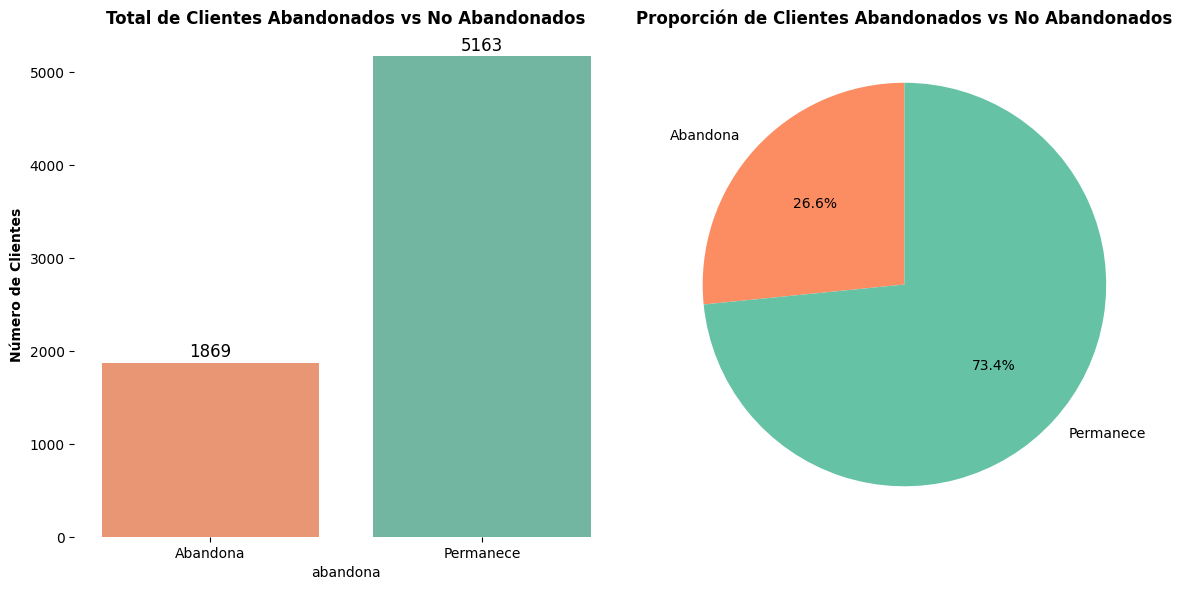

In [69]:
import seaborn as sns
import matplotlib.pyplot as plt

set2_colors = sns.color_palette('Set2')

custom_color_map = {'Permanece': set2_colors[0], 'Abandona': set2_colors[1]}

ordered_labels = sorted(telecom_df['abandona'].value_counts().index)
palette = [custom_color_map[label] for label in ordered_labels]

# Datos
abandono_total = telecom_df['abandona'].value_counts().sort_index()
permanencia_total = telecom_df['abandona'].value_counts(normalize=True).sort_index()

fig, ax = plt.subplots(1, 2, figsize=(12, 6))

# Gráfico de barras
sns.barplot(x=abandono_total.index, y=abandono_total.values, ax=ax[0],
            palette=palette, edgecolor='none', linewidth=0)

# Etiquetas en las barras
for p in ax[0].patches:
    ax[0].annotate(f'{int(p.get_height())}',
                   (p.get_x() + p.get_width() / 2., p.get_height()),
                   ha='center', va='center', fontsize=12, color='black',
                   xytext=(0, 8), textcoords='offset points')

for spine in ax[0].spines.values():
    spine.set_visible(False)

ax[0].set_title('Total de Clientes Abandonados vs No Abandonados', fontweight='bold')
ax[0].set_ylabel('Número de Clientes', fontweight='bold')

# Gráfico de pastel
ax[1].pie(permanencia_total, labels=permanencia_total.index, autopct='%1.1f%%',
          colors=palette, startangle=90)

ax[1].set_title('Proporción de Clientes Abandonados vs No Abandonados', fontweight='bold')

for spine in ax[1].spines.values():
    spine.set_visible(False)

plt.tight_layout()
plt.show()

### Recuento de evasión por variables categóricas

Ahora, exploraremos cómo se distribuye la evasión según variables categóricas, como género, tipo de contrato, método de pago, entre otras.

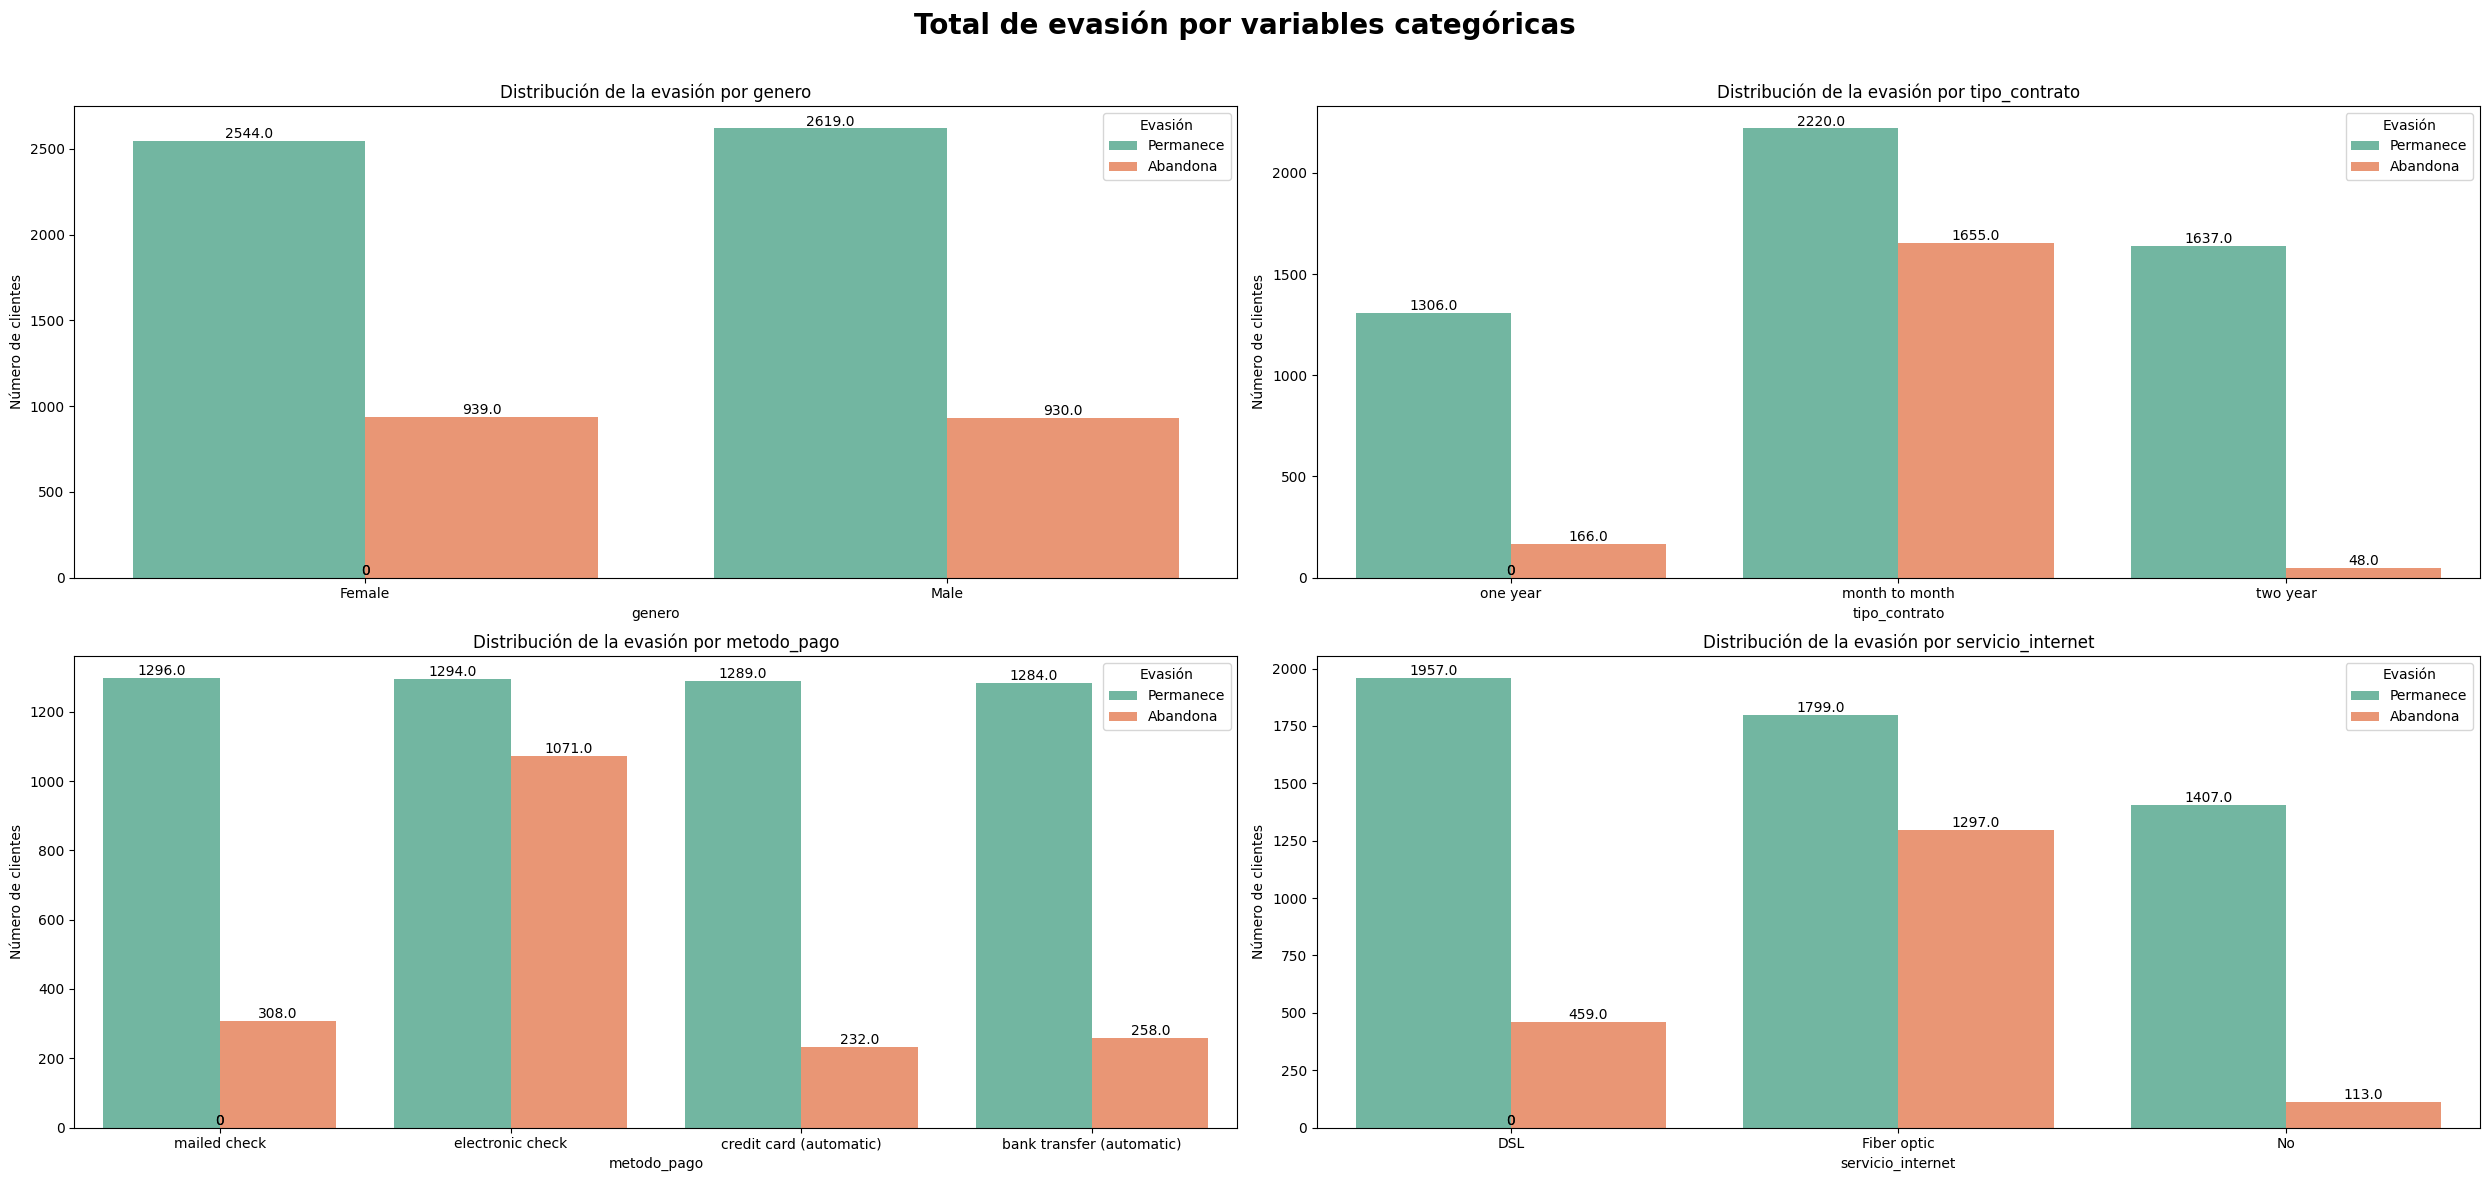

In [74]:
categorical_columns = ['genero', 'tipo_contrato', 'metodo_pago', 'servicio_internet']

plt.figure(figsize=(25, 12))

for i, column in enumerate(categorical_columns, 1):
    ax = plt.subplot(2, 2, i)
    sns.countplot(x=column, hue='abandona', data=telecom_df, palette='Set2', ax=ax)

    ax.set_title(f'Distribución de la evasión por {column}')
    ax.set_xlabel(column)
    ax.set_ylabel('Número de clientes')

    for p in ax.patches:
        ax.annotate(f'{p.get_height()}',
                    (p.get_x() + p.get_width() / 2., p.get_height()),
                    ha='center', va='center',
                    fontsize=10, color='black',
                    xytext=(0, 5), textcoords='offset points')

    ax.legend(title='Evasión', labels=['Permanece', 'Abandona'], loc='upper right')

plt.suptitle('Total de evasión por variables categóricas', fontsize=20, fontweight='bold')

plt.tight_layout()
plt.subplots_adjust(top=0.9)
plt.show()

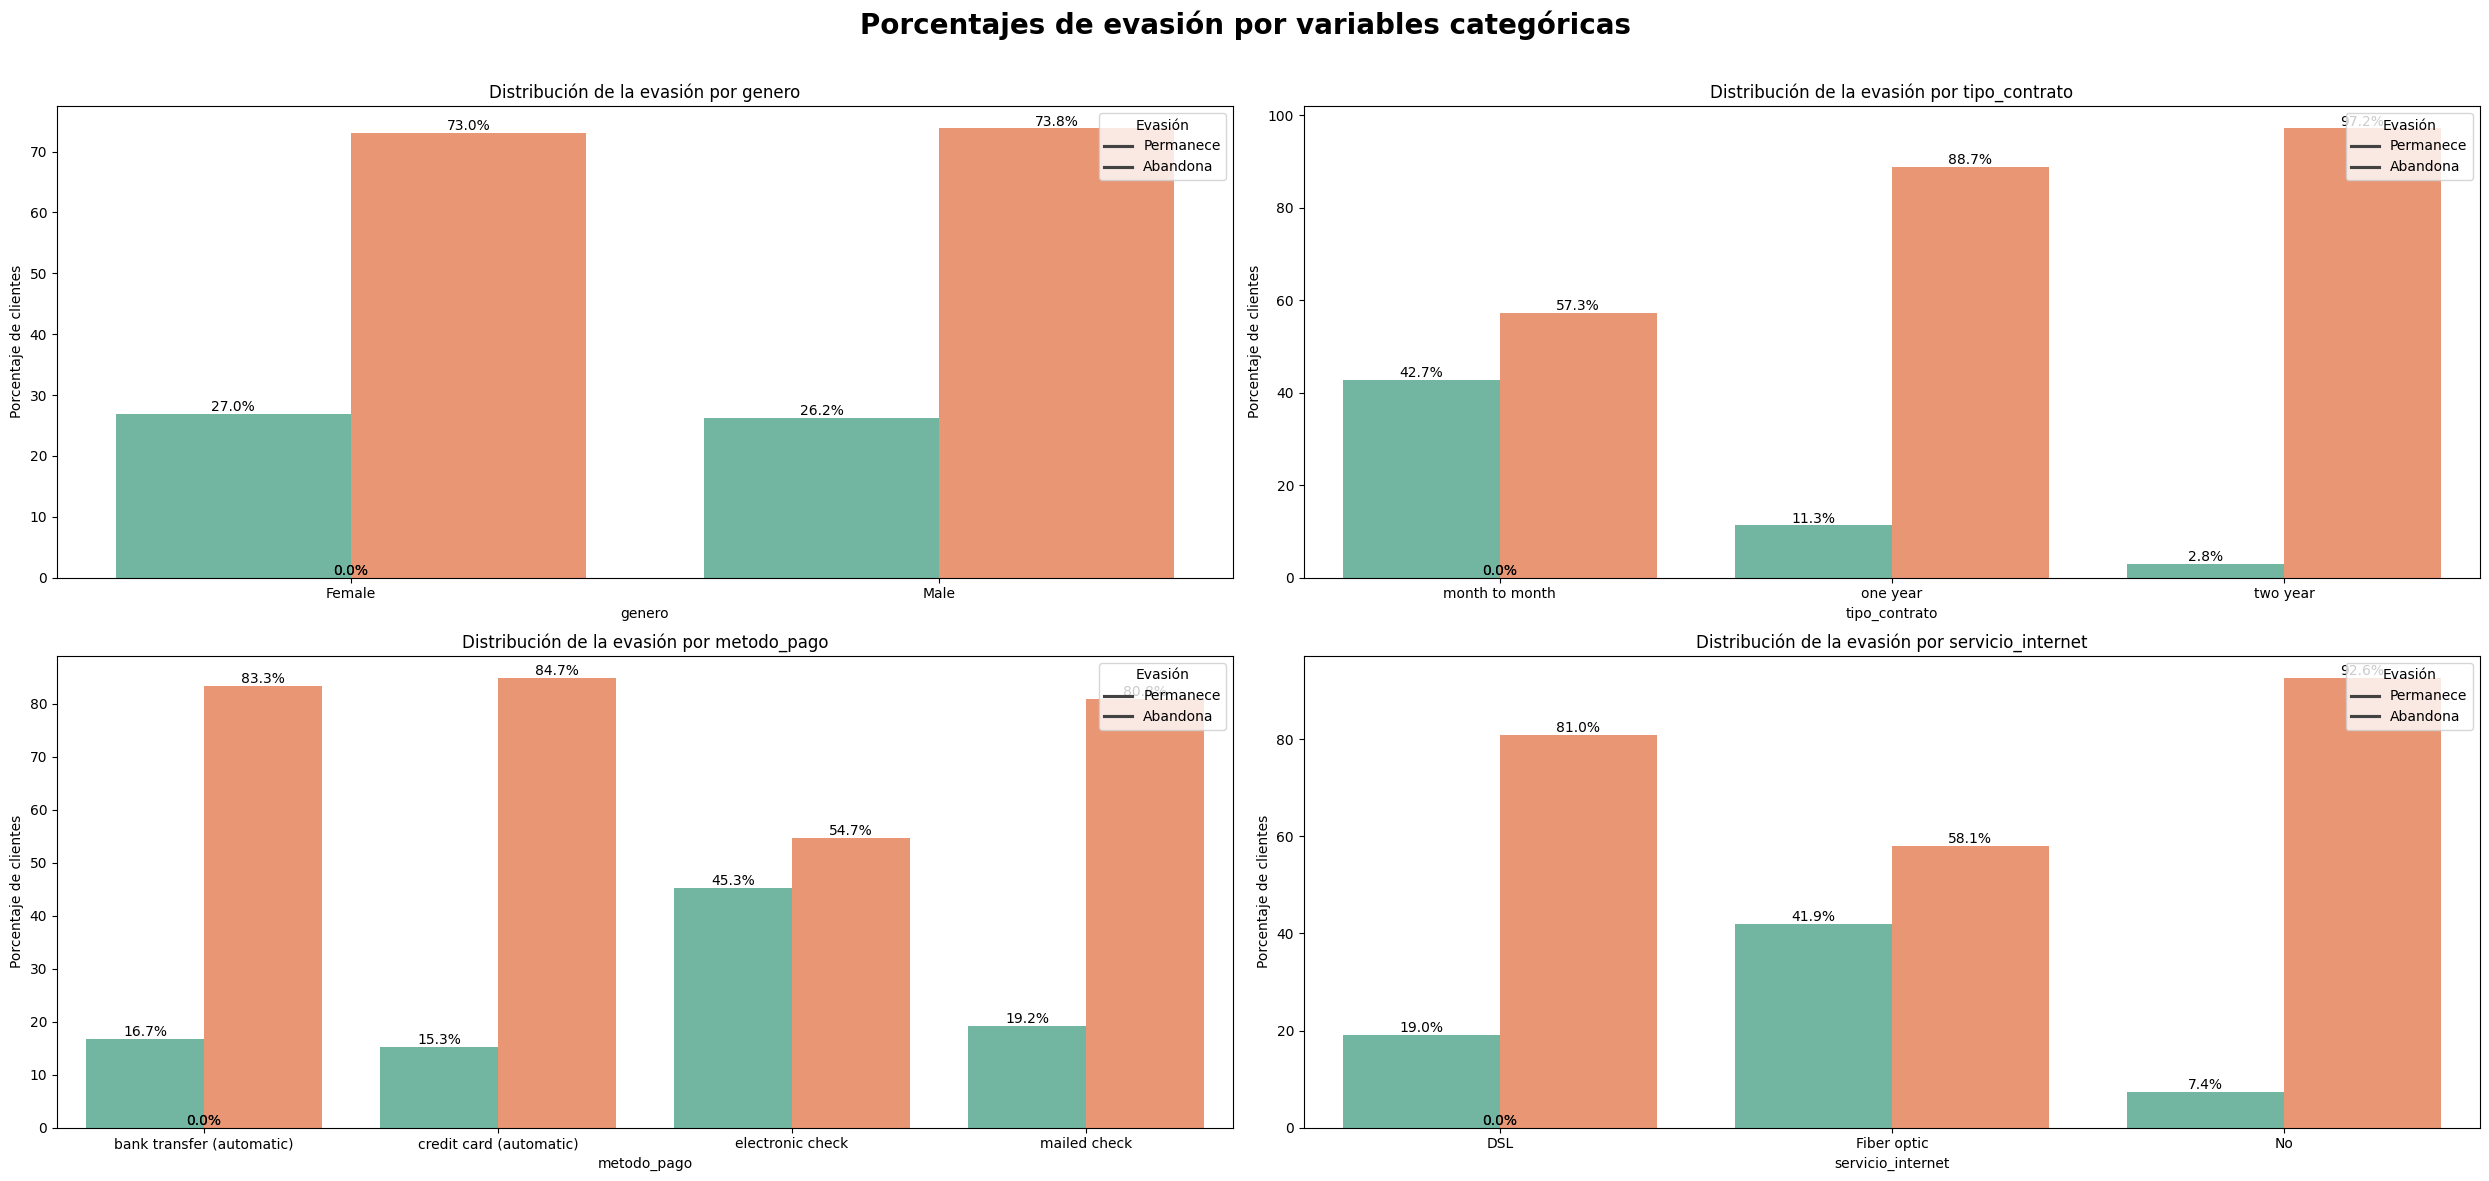

In [73]:
# Grafica para variables vategoricas
plt.figure(figsize=(25, 12))

for i, column in enumerate(categorical_columns, 1):
    ax = plt.subplot(2, 2, i)


    total_counts = telecom_df.groupby([column, 'abandona']).size().reset_index(name='count')
    total_counts['percentage'] = total_counts.groupby(column)['count'].transform(lambda x: x / x.sum() * 100)


    sns.barplot(x=column, y='percentage', hue='abandona', data=total_counts, palette='Set2', ax=ax)

    # Título y etiquetas de cada gráfico
    ax.set_title(f'Distribución de la evasión por {column}')
    ax.set_xlabel(column)
    ax.set_ylabel('Porcentaje de clientes')


    for p in ax.patches:
        height = p.get_height()
        ax.annotate(f'{height:.1f}%',
                    (p.get_x() + p.get_width() / 2., height),
                    ha='center', va='center',
                    fontsize=10, color='black',
                    xytext=(0, 5), textcoords='offset points')

    # Personalizar la leyenda (cambiar los valores de 0.0 y 1.0 por "Permanece" y "Abandona")
    ax.legend(title='Evasión', labels=['Permanece', 'Abandona'], loc='upper right')

# Título principal
plt.suptitle('Porcentajes de evasión por variables categóricas', fontsize=20, fontweight='bold')

plt.tight_layout()
plt.subplots_adjust(top=0.9)
plt.show()

### Conteo de evasión por variables númericas

In [63]:
def analizar_evasion_numericas(df, columnas, bins=4, mostrar=True):
    """
    Analiza la relación entre variables numéricas y la tasa de abandono,
    dividiendo los valores en bins por cuantiles.
    """
    resultados = {}
    df = df.copy()

    for col in columnas:
        bin_col = f'{col}_bin'

        # Crear intervalos (bins) por cuantiles
        df[bin_col] = pd.qcut(df[col], q=bins, duplicates='drop')


        tabla = pd.crosstab(df[bin_col], df['abandona'], normalize='index') * 100

        if set(df['abandona'].unique()) == {0, 1}:
            tabla.columns = ['% No Abandono', '% Abandono']
        else:
            tabla.columns = [f'% {col}' for col in tabla.columns]

        if mostrar:
            print(f'\n Análisis por rangos para: {col}')
            print(tabla)

        resultados[col] = tabla

    return resultados

# Ejecutar el análisis
numericas = ['meses_en_empresa', 'gastos_mensuales', 'gastos_totales', 'cuentas_diarias']
resultados_numericas = analizar_evasion_numericas(telecom_df, numericas, bins=5)


 Análisis por rangos para: meses_en_empresa
                      % Abandona  % Permanece
meses_en_empresa_bin                         
(0.999, 6.0]           53.333333    46.666667
(6.0, 20.0]            33.428776    66.571224
(20.0, 40.0]           22.372159    77.627841
(40.0, 60.0]           15.555556    84.444444
(60.0, 72.0]            6.609808    93.390192

 Análisis por rangos para: gastos_mensuales
                      % Abandona  % Permanece
gastos_mensuales_bin                         
(18.249, 25.05]         9.180791    90.819209
(25.05, 58.7]          25.125990    74.874010
(58.7, 79.1]           29.723992    70.276008
(79.1, 94.3]           35.997171    64.002829
(94.3, 118.75]         32.928571    67.071429

 Análisis por rangos para: gastos_totales
                    % Abandona  % Permanece
gastos_totales_bin                         
(18.799, 266.6]      46.044191    53.955809
(266.6, 939.7]       28.937990    71.062010
(939.7, 2033.85]     20.868946    79.131054
(20

# ¡Extra! Análisis de correlación entre variables

In [75]:
import plotly.express as px

corr_matrix = telecom_df.corr(numeric_only=True)

corr_long = corr_matrix.reset_index().melt(id_vars='index')
corr_long.columns = ['Variable 1', 'Variable 2', 'Correlación']

# Crear heatmap con plotly
fig = px.imshow(
    corr_matrix,
    text_auto=True,
    color_continuous_scale='RdBu',
    zmin=-1,
    zmax=1,
    title='Correlación entre variables numéricas'
)

fig.update_layout(
    title_font_size=18,
    title_font_color='black',
    title_x=0.5,  # Centra el título
    width=800,
    height=600
)
fig.show()

In [76]:
# Exportar a HTML
fig.write_html("correlacion_telecom.html")

# 📝 Informe Final del Análisis de Evasión de Clientes (Churn)

### 🔹 1. Introducción
Este análisis tiene como propósito comprender el fenómeno de evasión de clientes (Churn) en una empresa de telecomunicaciones ficticia llamada TelecomX. Mediante el estudio de los datos transaccionales y de servicios asociados a los clientes, se busca identificar patrones que expliquen la pérdida de usuarios. El objetivo es generar insights y recomendaciones que permitan reducir la tasa de abandono mediante estrategias informadas de retención.

### 2. Limpieza y Tratamiento de Datos
Fuente: Los datos fueron obtenidos en formato JSON desde un repositorio remoto.

Principales pasos realizados:
Se extrajo la información de una API remota en formato JSON.

Se normalizaron estructuras anidadas para obtener un dataframe plano.

Se seleccionaron las columnas más relevantes (servicio, comportamiento, demografía, facturación).

Se realizó un renombrado completo de variables para mayor claridad (por ejemplo, customer.gender → genero, account.Charges.Monthly → gastos_mensuales).

Se trató el tipo de datos, categorías, y valores nulos.

### 3. Análisis Exploratorio de Datos (EDA)
A continuación se describen algunos de los principales análisis visuales y estadísticos realizados.

Distribución de Churn
Se evaluó el balance de la variable objetivo
El churn representa aproximadamente el 26.5% de los clientes, mientras que el 73.5% permanece.

Variables demográficas y su relación con Churn
Edad (ciudadanos senior): Se observó una leve mayor evasión en personas mayores.

Género: No se encontraron diferencias sustanciales entre hombres y mujeres.

Tener dependientes o pareja: Aquellos sin dependientes tienden a abandonar más.

Variables de servicio
Clientes con contratos mensuales presentan mayor churn comparado con los de tipo anual.

El tipo de servicio de internet y el uso de servicios como respaldo online o soporte técnico tienen impacto en la decisión de abandono.
Variables de gasto
Los clientes con mayores gastos mensuales tienen una tasa de evasión más alta.

En contraste, el gasto total acumulado no se correlaciona tan fuertemente con el abandono.

Correlaciones
Se usó un heatmap para identificar correlaciones entre las variables numéricas y categóricas transformadas.

<Axes: xlabel='abandona', ylabel='gastos_mensuales'>

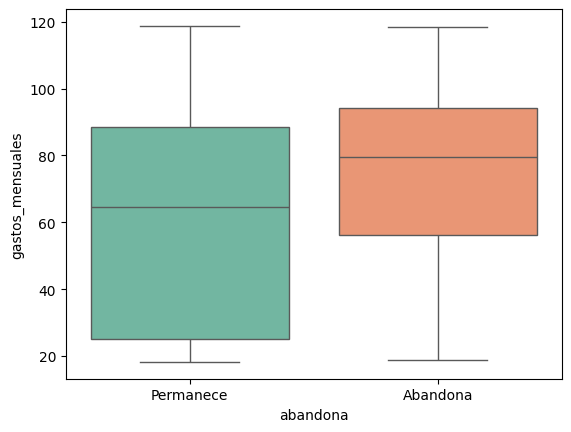

In [78]:
sns.boxplot(data=telecom_df, x='abandona', y='gastos_mensuales', hue='abandona',
            palette='Set2', legend=False)

Este análisis es crucial para entender si los clientes que abandonan tienden a pagar más (o menos) que los que permanecen. Una diferencia notable podría indicar que:

**Clientes con facturas más altas podrían estar más propensos a dejar el servicio por sentirlo costoso.**


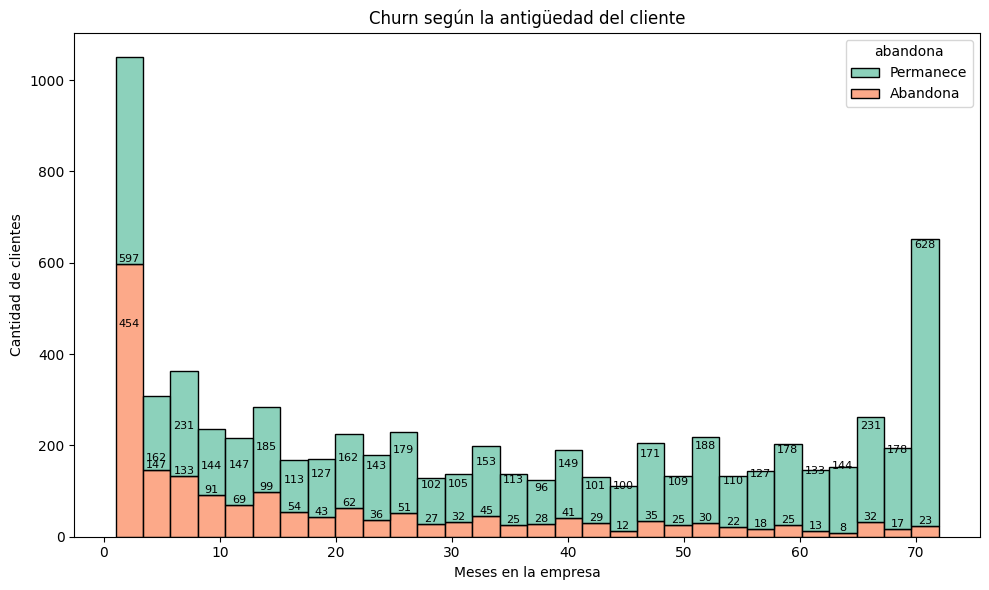

In [80]:
plt.figure(figsize=(10, 6))
bins = 30

# Histograma apilado con nueva paleta
hist_data = sns.histplot(data=telecom_df, x='meses_en_empresa', hue='abandona',
                         multiple='stack', bins=bins, palette='Set2')

# Etiquetas de conteo en las barras
for patch in hist_data.patches:
    height = patch.get_height()
    if height > 0:
        x = patch.get_x() + patch.get_width() / 2
        y = height
        hist_data.annotate(f'{int(height)}', xy=(x, y), ha='center', va='bottom', fontsize=8)

# Título y ejes
plt.title('Churn según la antigüedad del cliente')
plt.xlabel('Meses en la empresa')
plt.ylabel('Cantidad de clientes')
plt.tight_layout()
plt.show()

Podemos identificar si existe una relación entre el tiempo que un cliente lleva en la empresa y su probabilidad de churn.

*   **Si los abandonos se concentran en los primeros meses, puede indicar problemas.**
*   **En la experiencia inicial del cliente (onboarding, servicio, atención).**

### 4. Conclusiones e Insights
Con base en el análisis se concluye lo siguiente:

El churn está fuertemente asociado a contratos mensuales, indicando inestabilidad en relaciones a corto plazo.

El uso de servicios complementarios como soporte_tecnico y seguridad_online se asocia con menor churn.

Clientes sin dependientes o sin pareja tienden a abandonar más fácilmente.

Altos gastos mensuales pueden estar generando insatisfacción si no hay percepción de valor.

Los métodos de pago electrónicos no se vinculan directamente al churn, pero podrían combinarse con campañas automatizadas de retención.

 ### 5. Recomendaciones Estratégicas
🎯 Implementar programas de fidelización orientados a clientes con contrato mensual.

🛡️ Ofrecer de forma gratuita los primeros meses de servicios complementarios (como soporte técnico) a nuevos clientes.

📊 Usar modelos predictivos para identificar en tiempo real a los clientes en riesgo.

💬 Crear campañas de engagement específicas para clientes sin dependientes, que suelen presentar más rotación.

💸 Rediseñar paquetes de facturación ajustando los servicios al uso real del cliente para evitar churn por alto costo.